In [1]:
# https://codertw.com/%E7%A8%8B%E5%BC%8F%E8%AA%9E%E8%A8%80/634456/

In [2]:
# 網友該資料集在各模型跑出的RMSLE結果：RandomForestRegressor > SVR > KNeighborsRegressor

In [3]:
import numpy as np
import pandas as pd
get_ipython().magic('matplotlib inline')
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime 

# 讀取及觀察資料

In [4]:
df_origin = pd.read_csv("data/bikeshare/train.csv",sep=",")

In [5]:
print(df_origin.shape)
df_origin.head(1)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [6]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df_origin.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# df_origin.columns

In [9]:
df_test = pd.read_csv("data/bikeshare/test.csv",sep=",")
print(df_test.shape)
df_test.head(1)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027


In [10]:
# 檢測異常值
df_origin.isnull()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,False,False,False,False,False,False,False
10882,False,False,False,False,False,False,False,False,False,False,False,False
10883,False,False,False,False,False,False,False,False,False,False,False,False
10884,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
# 這寫法才是找出null值，大家都用上面那個，是能看個屁
df_origin[df_origin.isnull().T.any()]
# 非转置：frame3.isnull().any()，得到的每一列求any()计算的结果，输出为列的Series
# 转置：frame3.isnull().T.any()，得到的每一行求any()计算的结果，输出为行的Series

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


# 特徵工程

In [12]:
df_origin.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [13]:
# 時間離散化
df_origin['hour'] = df_origin['datetime'].str[11:13].astype(int)
df_origin.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0


In [14]:
from datetime import datetime 
week = [datetime.date(datetime.strptime(time, '%Y-%m-%d')).weekday() for time in df_origin['datetime'].str[:10]]
df_origin['week'] = week
df_origin.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5


In [15]:
# test
print(datetime.strptime('2011-01-01', '%Y-%m-%d')) # strptime返回一个对应于 date_string，根据 format 进行解析得到的 datetime 对象
print(datetime.now())
print(datetime.date(datetime.now())) # date()返回具有同样 year, month 和 day 值的 date 对象
print(datetime.date(datetime.now()).weekday()) # weekday()返回一个整数代表星期几，星期一为 0
print(datetime.date(datetime.strptime('2011-01-01', '%Y-%m-%d')).weekday())
print(datetime.date(datetime.strptime('2012-12-19', '%Y-%m-%d')).weekday())

2011-01-01 00:00:00
2022-03-05 09:46:44.245743
2022-03-05
5
5
2


In [16]:
df_origin['month'] = df_origin['datetime'].str[5:7].astype(int)
df_origin['year'] = df_origin['datetime'].str[0:4].astype(int)
df_origin.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011


In [17]:
# df_origin.columns.values

In [18]:
# 幹嘛不用drop就好？ 莫非是要移動year欄位的位置？
df_clean = df_origin.loc[:,['season', 'holiday', 'workingday', 'weather', 'temp',
'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
'hour', 'week', 'year', 'month']]
df_clean.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,year,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1


In [19]:
# 同理 處理test資料
df_test['hour'] = df_test['datetime'].str[11:13].astype(int)
week1 = [datetime.date(datetime.strptime(time, '%Y-%m-%d')).weekday()  for time in df_test['datetime'].str[:10]]
df_test['week'] = week1
df_test['month'] = df_test['datetime'].str[5:7].astype(int)
df_test['year'] = df_test['datetime'].str[0:4].astype(int)
df_clean_test = df_test.loc[:,['season', 'holiday', 'workingday', 'weather', 'temp',
'atemp', 'humidity', 'windspeed', 'hour', 'week', 'year', 'month']]
df_clean_test.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,week,year,month
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,2011,1


In [20]:
# test
# df1 = pd.DataFrame({'a':[1,2,3,3,1.2],
#                    'b':[4,5,6,7,3.9]})
# df1['a'].hist() 

<AxesSubplot:>

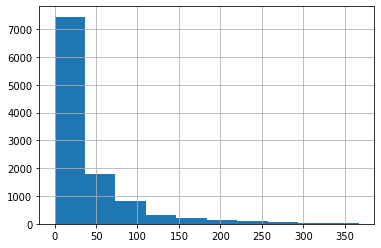

In [21]:
# 檢查資料均衡
# log casual和register，然後相加
df_clean['casual'].hist() # hist直方圖是數據分佈的表示，代表某數值出現多少次，例如下圖0~2x出現7千多次，區間我不確定，自建資料測試也看不出來

<AxesSubplot:>

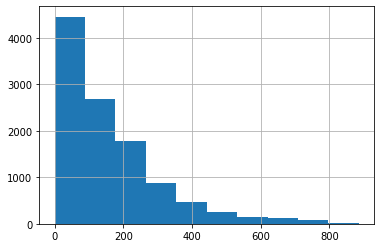

In [22]:
df_clean['registered'].hist()

In [23]:
df_clean.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,year,month
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1


In [24]:
df_clean['log_cas'] = np.log(df_origin['casual'])
df_clean['log_reg'] = np.log(df_origin['registered'])
df_clean.head(1)

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,year,month,log_cas,log_reg
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1,1.098612,2.564949


In [25]:
df_clean.shape

(10886, 17)

In [26]:
# 我加：casual=0會造成log_cas=-inf，後面模型會出錯，所以刪了
df_clean = df_clean[df_clean['casual']!=0]

In [27]:
df_clean.shape

(9900, 17)

In [28]:
df_clean_test.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,week,year,month
0,1,0,1,1,10.66,11.365,56,26.0027,0,3,2011,1


In [29]:
df_clean.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,year,month,log_cas,log_reg
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,1,1.098612,2.564949


#### 對casual預測準確度
#### 剔除特徵重要度< 0.01的特徵

In [30]:
# n_estimators表示多少顆樹
clf_cal = RandomForestRegressor(n_estimators=1000, min_samples_split=11, oob_score=True)
clf_cal

RandomForestRegressor(min_samples_split=11, n_estimators=1000, oob_score=True)

In [31]:
# 隨機森林特徵選擇
fea_cols=['season', 'holiday', 'workingday', 'weather', 'temp',
'atemp', 'humidity', 'windspeed',
'hour', 'week', 'year']

In [32]:
# 許多特徵之間有太多相關性
# season和month，二選一
# temp和atemp，二選一
# humidity和weather，windspeed，看rf的特徵重要度
# week和workingday
df_clean[fea_cols].corr() # 查找數據中所有列的成對相關性。任何na值、非數字數字欄位將忽略

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,week,year
season,1.000000,0.032513,-0.009607,0.023422,0.222085,0.227255,0.197874,-0.149029,-0.033700,-0.012218,-0.010106
holiday,0.032513,1.000000,-0.247426,-0.005290,-0.000640,-0.006195,0.012261,0.004562,-0.009556,-0.199990,0.013660
workingday,-0.009607,-0.247426,1.000000,0.036444,0.044183,0.036942,-0.031111,0.028160,0.045596,-0.705240,-0.005599
weather,0.023422,-0.005290,0.036444,1.000000,-0.058356,-0.058810,0.405909,0.000517,-0.014139,-0.051753,-0.010571
temp,0.222085,-0.000640,0.044183,-0.058356,1.000000,0.983975,-0.064897,-0.024715,0.092380,-0.052888,0.045690
atemp,0.227255,-0.006195,0.036942,-0.058810,0.983975,1.000000,-0.043757,-0.059873,0.087970,-0.053118,0.043428
humidity,0.197874,0.012261,-0.031111,0.405909,-0.064897,-0.043757,1.000000,-0.316703,-0.264484,-0.014751,-0.077817
windspeed,-0.149029,0.004562,0.028160,0.000517,-0.024715,-0.059873,-0.316703,1.000000,0.140234,-0.036869,-0.017996
hour,-0.033700,-0.009556,0.045596,-0.014139,0.092380,0.087970,-0.264484,0.140234,1.000000,-0.031334,-0.007198
week,-0.012218,-0.199990,-0.705240,-0.051753,-0.052888,-0.053118,-0.014751,-0.036869,-0.031334,1.000000,-0.000766


0.8695545511942735

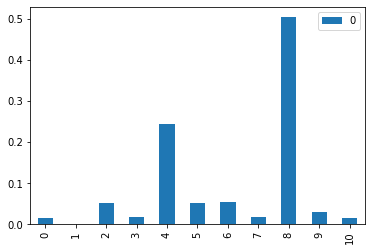

In [33]:
clf_cal.fit(df_clean[fea_cols].values, df_clean['log_cas'].values) # 前者是資料，後者是答案
pd.DataFrame(clf_cal.feature_importances_).plot(kind='bar')
clf_cal.oob_score_
# 隨機森林樣本中有一部分原始樣本資料(~ 40%)不會出現在訓練資料集中，這些資料便稱為 Out-Of-Bag (OOB) 資料。而透過這些資料來評估模型的方式，稱為 OOB 估計，
# 這和Cross Validation一樣，但相較起交叉驗證，OOB 估計能透過少量資料的計算量達到近似於交叉驗證的結果，對於交叉驗證的高計算量下，是一個節省資源的採樣及估計方式

In [34]:
clf_cal.feature_importances_ # 這是看哪個欄位和結果最相關吧？！ 想不到隨機森林內建這好東西

array([0.0154649 , 0.0008818 , 0.05267718, 0.01822682, 0.24248646,
       0.05120399, 0.05345829, 0.01703333, 0.50360587, 0.03039816,
       0.0145632 ])

In [35]:
# 我加：這應該是指訓練資料本身的準確率吧？
clf_cal.score(df_clean[fea_cols].values, df_clean['log_cas'].values)

0.940659320264434

In [36]:
# 拿掉最不相關的holiday，以及和temp類似的atemp?
fea_cas = ['season', 'workingday', 'weather', 'temp','humidity', 'windspeed','hour', 'week', 'year']

0.8694116977101067

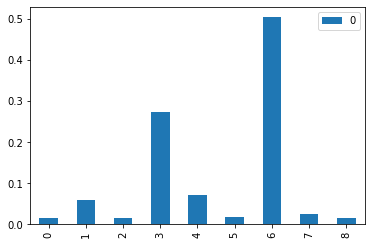

In [37]:
clf_cal.fit(df_clean[fea_cas].values, df_clean['log_cas'].values)
pd.DataFrame(clf_cal.feature_importances_).plot(kind='bar')
clf_cal.oob_score_

In [38]:
# 我加
clf_cal.score(df_clean[fea_cas].values, df_clean['log_cas'].values)

0.9395884974569856

#### 對registered預測準確度

In [39]:
clf_reg = RandomForestRegressor(n_estimators=1000, min_samples_split=11, oob_score=True)

In [40]:
# 我加：registered=0會造成log_reg=-inf，後面模型會出錯，所以刪了
df_clean = df_clean[df_clean['registered']!=0]

0.9398389562001538

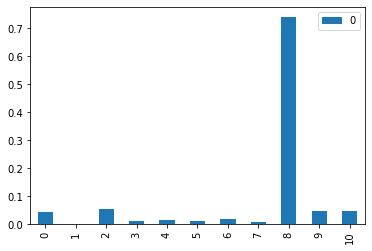

In [41]:
clf_reg.fit(df_clean[fea_cols].values, df_clean['log_reg'].values)
pd.DataFrame(clf_reg.feature_importances_).plot(kind='bar')
clf_reg.oob_score_

In [42]:
clf_reg.feature_importances_

array([0.0435855 , 0.00168081, 0.05575071, 0.01088765, 0.01609461,
       0.01302837, 0.01858914, 0.00645772, 0.73998269, 0.04566669,
       0.04827612])

In [43]:
fea_regs=['season', 'workingday', 'weather', 'temp', 'humidity', 'hour', 'week', 'year']

0.940204272497929

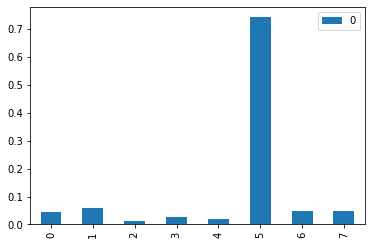

In [44]:
clf_reg.fit(df_clean[fea_regs].values, df_clean['log_reg'].values)
pd.DataFrame(clf_reg.feature_importances_).plot(kind='bar')
clf_reg.oob_score_

In [45]:
y_pred7 = np.exp(clf_cal.predict(df_clean_test[fea_cas]))   np.exp(clf_reg.predict(df_clean_test[fea_regs])) - 2
y_pred7[:40]

SyntaxError: invalid syntax (2160991736.py, line 1)

In [ ]:
# 對結果四捨五入
y_pred7 = [round(x) for x in y_pred7]
df_test['count'] = y_pred7
df_test['count'] = df_test['count'].astype(int)
df_test.head()

In [ ]:
print(df_test.shape)
df_test.to_csv('result.csv', sep=',', columns=['datetime', 'count'], header=['datetime', 'count'], index = False)